#EDA
sumber: https://medium.com/belajar-nulis/exploratory-data-analysis-adalah-c8d3ddc0d537

In [ ]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')
# !pip install seaborn
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif



In [ ]:
dataset = pd.read_csv('/content/bank-additional-full.csv', sep=';', quotechar='"')

In [ ]:
dataset = pd.DataFrame(dataset)

##data dictionary
informasi mengenai data seperti arti, relasi dengan data yang lain, asal data, penggunaan dan format

In [ ]:
#Info Dataset
print(dataset.shape)
print()
print(dataset.info())
print()
print(dataset.head())

In [ ]:
dataset.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

1. Data terdiri dari 41.188 baris dan 21 kolom
2. Kolom tipe objek (10):  job, marita, education, default,housing, loan, contact, month, day_of_week, poutcome
3. Kolom int (5): age, duration, campaign, pdays, previous  
4. Kolom float (5):   emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed
5. Data memiliki kolom target y (objek)
6. Ada 6 kolom yang punya missing value

## Analisa deskriptif

In [ ]:
dataset.describe()

In [ ]:
dataset.y.value_counts("y")

Apakah klien telah berlangganan deposito berjangka? (biner: 'ya', 'tidak')
- 88,73% tidak berlangganan
- 11,26% berlangganan
- ada imbalance data, kls no jauh lebih banyak

!!!cari teknik untuk mengatasi imbalance data ini


## list pertanyaan
1. hubungan y dengan kolom yang ada missing value:
  - y - job
  - y - marital
  - y - education
  - y - default
  - y - housing
  - y - loan

In [ ]:
dataset.y.value_counts("y")

In [ ]:
dataset.job.value_counts("job")

,proportion
job,
admin.,0.253035
blue-collar,0.224677
technician,0.163713
services,0.096363
management,0.070992
retired,0.041760
entrepreneur,0.035350
self-employed,0.034500
housemaid,0.025736


In [ ]:
dataset.marital.value_counts("marital")

In [ ]:
dataset.default.value_counts("default")

In [ ]:
dataset.education.value_counts("education")

,proportion
education,
university.degree,0.295426
high.school,0.231014
basic.9y,0.146766
professional.course,0.127294
basic.4y,0.101389
basic.6y,0.055647
unknown,0.042027
illiterate,0.000437


In [ ]:
dataset.housing.value_counts("housing")

,proportion
housing,
yes,0.523842
no,0.452122
unknown,0.024036


In [ ]:
dataset.loan.value_counts("loan")

,proportion
loan,
no,0.824269
yes,0.151695
unknown,0.024036


## visualisasi data

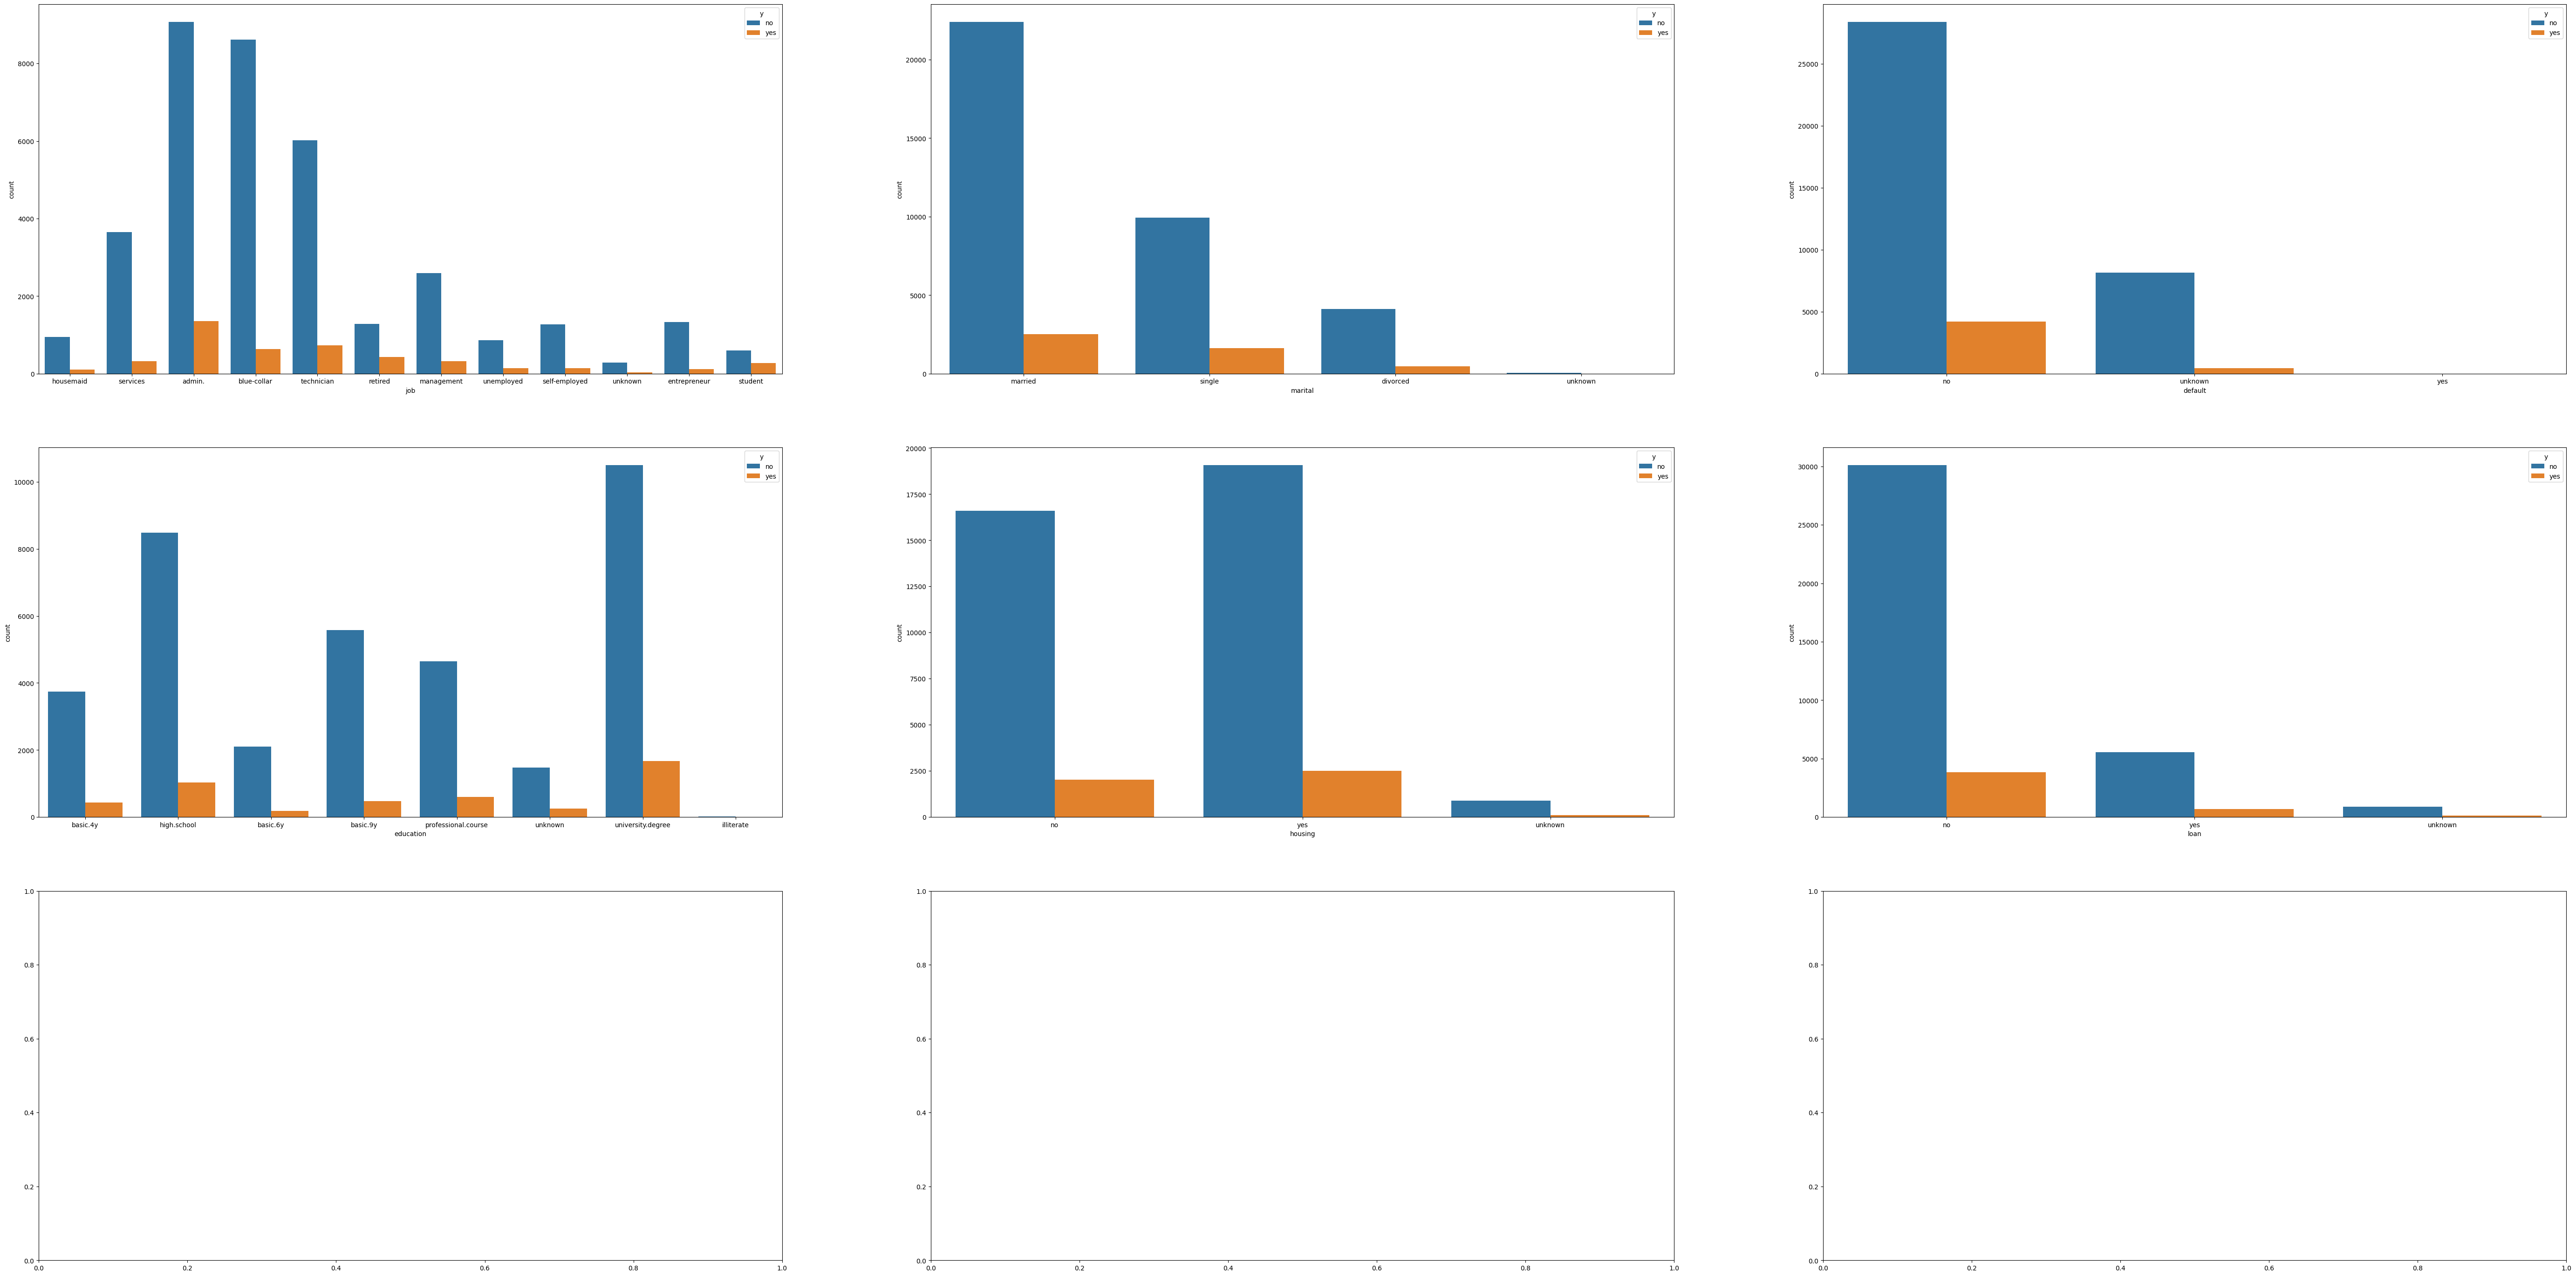

In [ ]:
cat_var = ["job", "marital", "default", "education", "housing", "loan"]
fig, axes = plt.subplots(3,3, figsize=(70,35))
for cat, ax in zip(cat_var, axes.flatten()):
    # Explicitly set the column for the x-axis
    sns.countplot(x=cat, data=dataset, hue='y',ax=ax)

# preprocessing data

## 1. data cleaning
menangani duplicate dan missing val data
hasil:
- missing value di 6 kolom
- ada 12 data duplikat
- setelh cleaning: ada 14 duplikat

In [ ]:
#Cek missing value
dataset.replace("unknown", np.nan, inplace=True)
dataset.isnull().sum()

,0
age,0
job,330
marital,80
education,1731
default,8597
housing,990
loan,990
contact,0
month,0
day_of_week,0


### menangani missing value

In [ ]:
for col in dataset.select_dtypes(include='object').columns:
    data_null = dataset[col].isnull().sum()
    unknown_count = data_null
    if unknown_count > 0:
        print(f"{col}: {unknown_count} unknown values")

job: 330 unknown values
marital: 80 unknown values
education: 1731 unknown values
default: 8597 unknown values
housing: 990 unknown values
loan: 990 unknown values


In [ ]:
cols_to_impute = ['job', 'marital', 'education', 'default', 'housing', 'loan']

for col in cols_to_impute:
    mode_value = dataset[col].mode()[0]
    dataset[col].fillna(mode_value, inplace=True)

In [ ]:
# cek duplicate data
dataset.duplicated().sum()

np.int64(14)

In [ ]:
# drop duplikat data
dataset.drop_duplicates(inplace=True)

## 2. transformasi data

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoded_data = dataset.copy()
label_encoders = {}

for column in dataset.columns:
    if dataset[column].dtype == 'object':
        le = LabelEncoder()
        encoded_data[column] = le.fit_transform(dataset[column])
        label_encoders[column] = le

encoded_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,1,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,1,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


## 3. reduksi data (pilih fitur)
ini coba pakai information gain dan chisquare, heatmap juga bisa sih

### pilih kolom (heatmap)

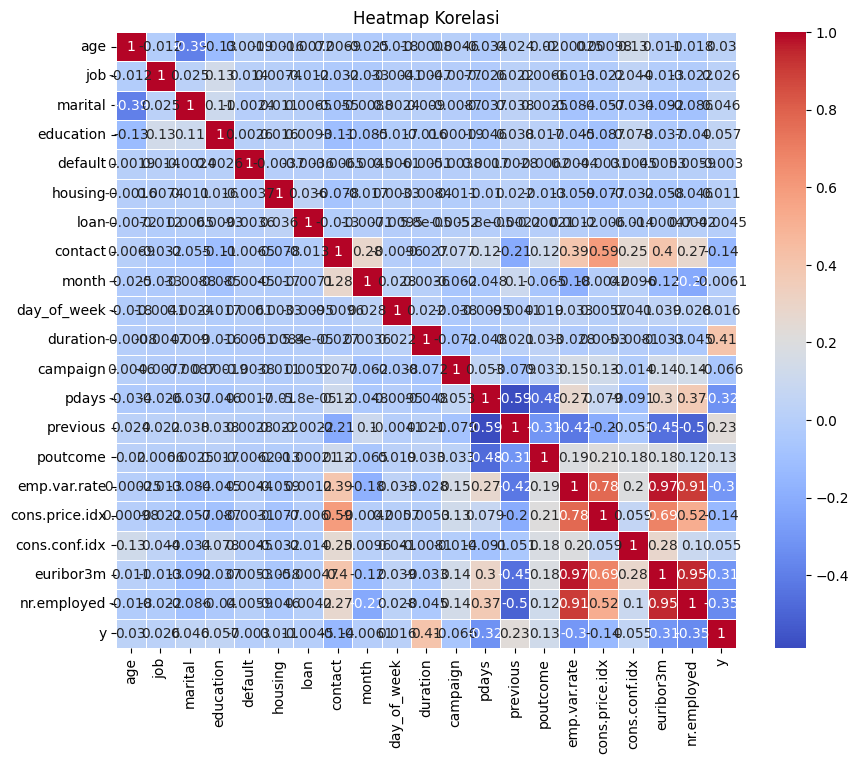

In [ ]:
# kolom numerik
plt.figure(figsize=(10, 8))
sns.heatmap(encoded_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

In [ ]:
correlation = encoded_data.corr()
cor_target = correlation['y'].abs().sort_values(ascending=False)
print(cor_target)

y                 1.000000
duration          0.405292
nr.employed       0.354663
pdays             0.324946
euribor3m         0.307733
emp.var.rate      0.298281
previous          0.230197
contact           0.144774
cons.price.idx    0.136131
poutcome          0.129814
campaign          0.066371
education         0.057237
cons.conf.idx     0.054819
marital           0.045892
age               0.030389
job               0.025596
day_of_week       0.015964
housing           0.011144
month             0.006057
loan              0.004486
default           0.003042
Name: y, dtype: float64


### information gain

In [ ]:
from sklearn.feature_selection import mutual_info_classif

X = encoded_data.drop('y', axis=1)
y = encoded_data['y']

info_gain = mutual_info_classif(X, y, discrete_features='auto')

# Tampilkan hasilnya
feature_scores = pd.Series(info_gain, index=X.columns)
feature_scores = feature_scores.sort_values(ascending=False)

# print("Information Gain tiap fitur terhadap label y:")
# print(feature_scores)



In [ ]:
selected_features = feature_scores[feature_scores > 0.05].index
print("Fitur yang dipilih dari information gain:", selected_features.tolist())

selected_features = cor_target[cor_target > 0.2].index
print("Fitur yang dipilih dari heatmap:", selected_features.tolist())

Fitur yang dipilih dari information gain: ['duration', 'euribor3m', 'cons.conf.idx', 'cons.price.idx', 'nr.employed', 'emp.var.rate']
Fitur yang dipilih dari heatmap: ['y', 'duration', 'nr.employed', 'pdays', 'euribor3m', 'emp.var.rate', 'previous']


## outlier

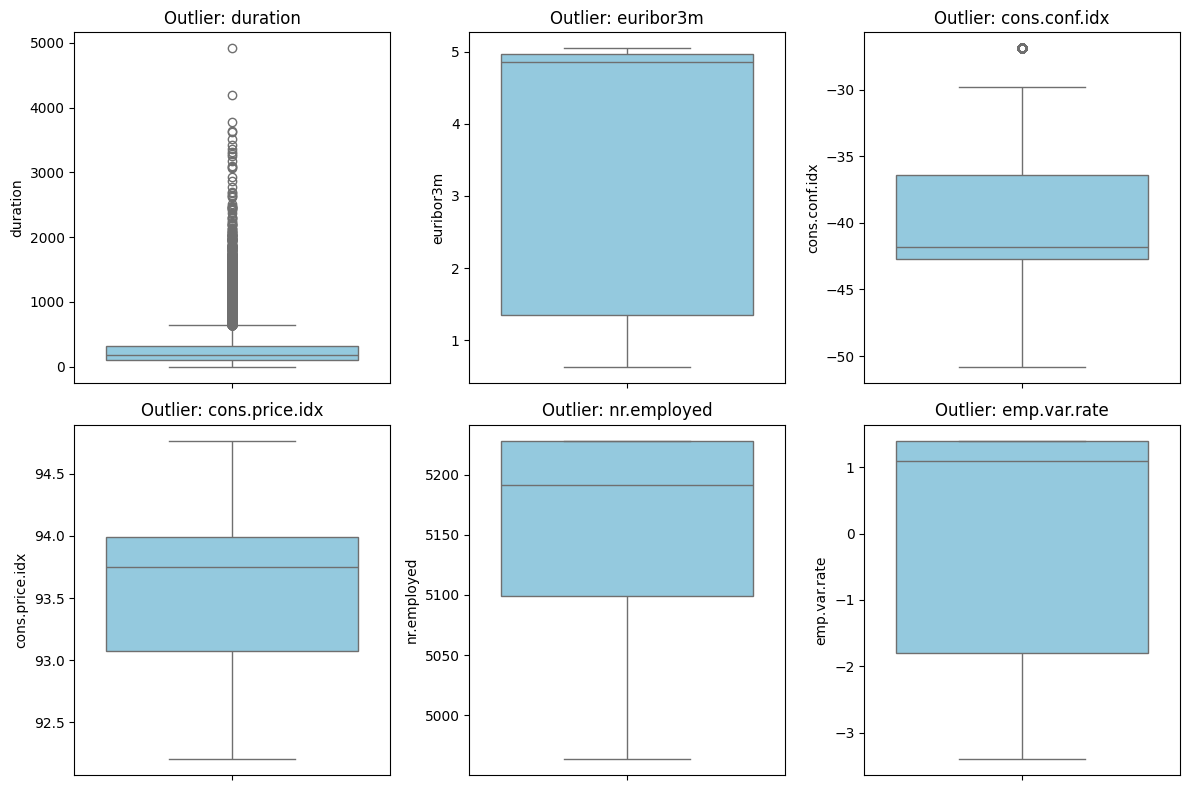

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter features with positive information gain
features_to_plot = feature_scores[feature_scores > 0.05].index

# Calculate the number of rows and columns needed
n_features = len(features_to_plot)
n_cols = 3  # You can adjust the number of columns
n_rows = (n_features + n_cols - 1) // n_cols

plt.figure(figsize=(12, n_rows * 4)) # Adjust figure size based on the number of rows

for i, column_name in enumerate(features_to_plot):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=dataset[column_name], color='skyblue')
    plt.title(f'Outlier: {column_name}')

plt.tight_layout()
plt.show()

# oversampling pakai SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
# ambil data hanya kolom yang dipilih
columns = ['euribor3m', 'cons.conf.idx', 'nr.employed', 'cons.price.idx', 'emp.var.rate', 'y']

data = pd.DataFrame(encoded_data[columns])

X = data.drop('y', axis=1)
y = data['y']

# split data 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41174 entries, 0 to 41187
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   euribor3m       41174 non-null  float64
 1   cons.conf.idx   41174 non-null  float64
 2   nr.employed     41174 non-null  float64
 3   cons.price.idx  41174 non-null  float64
 4   emp.var.rate    41174 non-null  float64
 5   y               41174 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 2.2 MB


In [ ]:
# apply SMOTE
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

## perbandingan data

Sebelum SMOTE:
y
0    29254
1     3685
Name: count, dtype: int64

Sesudah SMOTE:
y
0    29254
1    29254
Name: count, dtype: int64


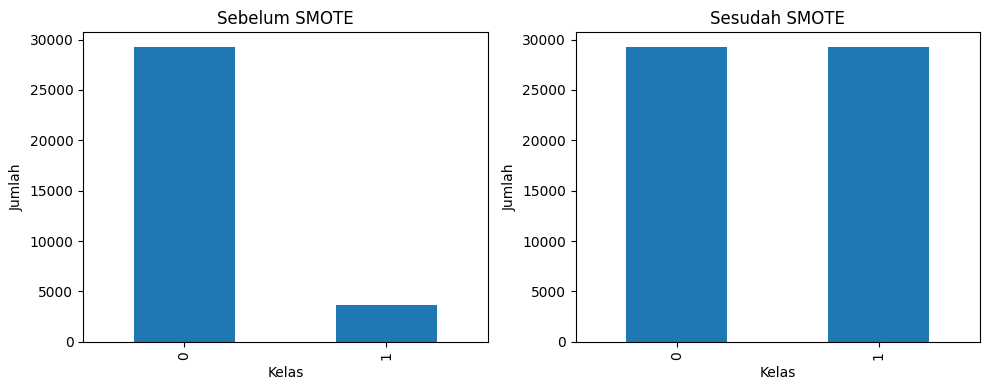

In [ ]:
counts_before = pd.Series(y_train).value_counts()
counts_after = pd.Series(y_train_resampled).value_counts()

print("Sebelum SMOTE:")
print(pd.Series(y_train).value_counts())
print("\nSesudah SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

counts_before.plot(kind='bar', ax=ax[0], title='Sebelum SMOTE')
counts_after.plot(kind='bar', ax=ax[1], title='Sesudah SMOTE')

ax[0].set_xlabel("Kelas")
ax[1].set_xlabel("Kelas")
ax[0].set_ylabel("Jumlah")
ax[1].set_ylabel("Jumlah")

plt.tight_layout()
plt.show()

# Training data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## pakai SMOTE

In [ ]:
# fit data
model_smote = DecisionTreeClassifier()
model_smote.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier()

In [ ]:
# prediksi
y_pred = model_smote.predict(X_test)

## ORI no SMOTE

In [ ]:
# fit data
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_0 = model.predict(X_test)

In [ ]:
# perbandingan prediksi dan test
print("SMOTE:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

SMOTE: 0.8399514268366728
              precision    recall  f1-score   support

           0       0.94      0.87      0.91      7281
           1       0.38      0.59      0.46       954

    accuracy                           0.84      8235
   macro avg       0.66      0.73      0.68      8235
weighted avg       0.88      0.84      0.85      8235



In [ ]:
# perbandingan hasil
print("Tanpa SMOTE:", accuracy_score(y_test, y_pred_0))
print(classification_report(y_test, y_pred_0))

Tanpa SMOTE: 0.8892531876138433
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7281
           1       0.56      0.21      0.30       954

    accuracy                           0.89      8235
   macro avg       0.73      0.59      0.62      8235
weighted avg       0.86      0.89      0.87      8235



# evaluasi

In [ ]:
from sklearn.metrics import classification_report, precision_recall_curve, auc

In [ ]:
# PR-AUC TANPA SMOTE
y_score_1 = model.predict_proba(X_test)[:, 1]
precision_1, recall_1, _ = precision_recall_curve(y_test, y_score_1)
pr_auc_1 = auc(recall_1, precision_1)

print("PR-AUC TANPA SMOTE:", pr_auc_1)

# PR-AUCE SMOTE
y_score_2 = model_smote.predict_proba(X_test)[:, 1]
precision_2, recall_2, _ = precision_recall_curve(y_test, y_score_2)
pr_auc_2 = auc(recall_2, precision_2)

print("PR-AUC SMOTE:", pr_auc_2)

PR-AUC TANPA SMOTE: 0.4051246945750384
PR-AUC SMOTE: 0.3941848792733629


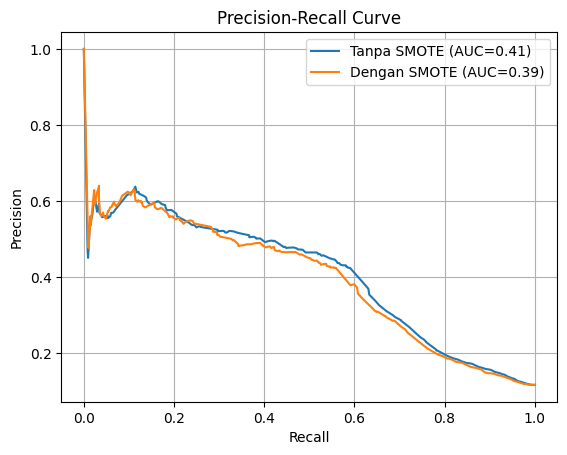

In [ ]:
# GRAFIK PERBANDINGAN
plt.plot(recall_1, precision_1, label=f"Tanpa SMOTE (AUC={pr_auc_1:.2f})")
plt.plot(recall_2, precision_2, label=f"Dengan SMOTE (AUC={pr_auc_2:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.show()

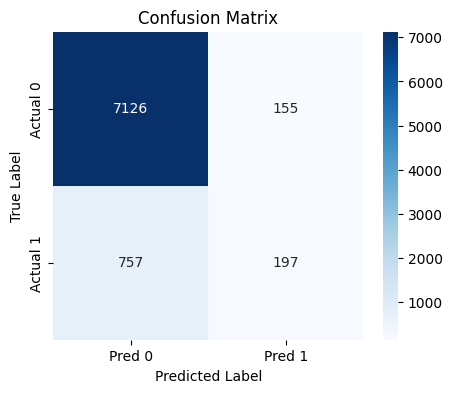

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cm = confusion_matrix(y_test, y_pred_0)
cm_smote = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Pred 0", "Pred 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

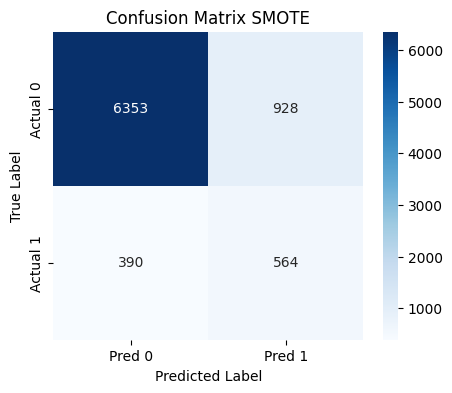

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_smote, annot=True, fmt="d", cmap="Blues", xticklabels=["Pred 0", "Pred 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix SMOTE")
plt.show()